## Import the library

In [ ]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

### Read the dataset

In [ ]:
data = pd.read_csv('Data_final.csv')

In [ ]:
data.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher


In [ ]:
data.shape

(105, 11)

# **Encoding and Spliiting dataset**

# Changing things up try to use Clustering

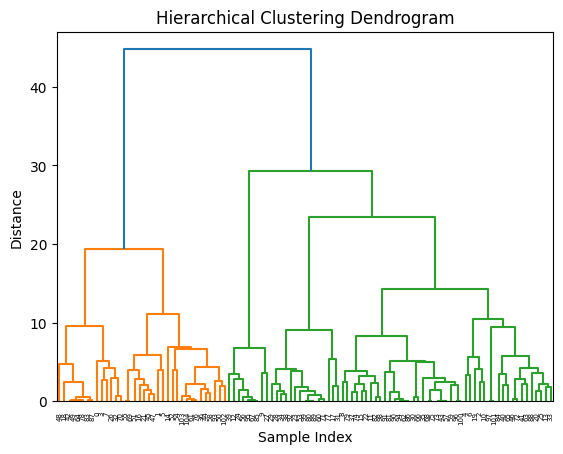

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

x = data.drop(columns=['Career'])
y = data['Career']

linkage_matrix = linkage(x, method='ward')

dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
n_clusters = 105
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(x)
labels = clustering.labels_
labels

array([ 79,  59,  95,  91,  77,  83,  53,  65, 101,  69,  97, 103,  89,
        63,  52,  71,  57,  61,  96, 104,  70,  66,  54,  62,  32,  87,
        85,  30,  68,  56,  80,  67,  78,  99,  76,  81,  64,  73,  26,
        74,  58,  55,  51, 102,  36,  75,  86,  88,  93,  98,  60,  84,
        28,  34,  31,  25,  41,  82,  27,  29,  43,  92, 100,  49,  45,
        72,  38,  47,  50,  94,  13,  12,  14,  24,  33,  42,  15,  37,
        40,  39,  48,  35,  19,  90,  18,  44,   6,  23,  17,  20,   9,
        16,   7,  46,  11,  21,   5,  22,   2,  10,   8,   4,   3,   1,
         0])

In [ ]:
kmeans=KMeans(n_clusters = n_clusters,random_state=42)
model=kmeans.fit(x)
model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-28477860208e>:2: ConvergenceWarning: Number of distinct clusters (93) found smaller than n_clusters (105). Possibly due to duplicate points in X.
  model=kmeans.fit(x)


array([21, 16, 36, 40, 20, 24, 27, 46, 22, 23, 12, 52, 45, 47, 15, 42, 62,
       54, 56, 32,  1,  8, 70, 66, 71, 68, 35, 17, 55, 69, 78, 59, 65, 53,
       63, 28, 25, 11, 37, 38, 18, 49, 90, 64, 73, 75, 26, 60, 34, 90, 44,
       31, 19, 74, 13, 30, 83, 64, 67, 61, 76, 91,  6, 57, 92, 58, 80, 86,
       14, 30, 77, 88, 87, 64,  2, 14, 84,  7, 79, 51,  4, 72, 29, 89, 50,
       86,  6,  5, 39,  4, 85, 33, 41, 43,  6,  3, 48,  9, 81,  4, 48,  9,
        0, 82, 10], dtype=int32)

In [ ]:
x1=x.copy()
x1.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67


In [ ]:
x1['clusters']=pd.Series(model.labels_)
x1.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,clusters
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,21
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,16
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,36
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,40
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,20


In [ ]:
x1['clusters'].value_counts()

clusters
64    3
4     3
6     3
14    2
86    2
     ..
55    1
17    1
35    1
68    1
10    1
Name: count, Length: 93, dtype: int64

In [ ]:
x1['clusters'].value_counts().values

array([3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

Length of model.cluster_centers_[:,6]: 105
Length of model.cluster_centers_[:,7]: 105
Length of size: 3
Length of color: 1
Length of sizes: 3


<ipython-input-28-6c655a113843>:9: UserWarning: The sizes list has more values (105) than needed (1), which may not be intended.
  sns.scatterplot(x=model.cluster_centers_[:,6], y=model.cluster_centers_[:,7], size=[500]*len(model.cluster_centers_[:,6]), color='b', sizes=[100]*len(model.cluster_centers_[:,6]))


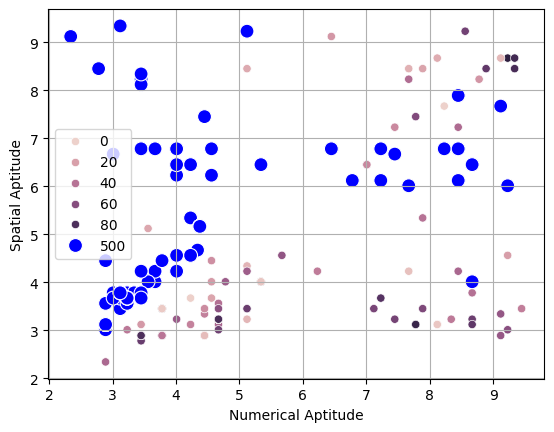

In [ ]:
print("Length of model.cluster_centers_[:,6]:", len(model.cluster_centers_[:,6]))
print("Length of model.cluster_centers_[:,7]:", len(model.cluster_centers_[:,7]))
print("Length of size:", len([500,500,500]))
print("Length of color:", len(['b']))
print("Length of sizes:", len([100,100,100]))

sns.scatterplot(x='Numerical Aptitude',y='Spatial Aptitude',data=x1,hue='clusters')
#sns.scatterplot(x=model.cluster_centers_[:,6],y=model.cluster_centers_[:,7],size=[500,500,500],color='b',sizes=[100,100,100])
sns.scatterplot(x=model.cluster_centers_[:,6], y=model.cluster_centers_[:,7], size=[500]*len(model.cluster_centers_[:,6]), color='b', sizes=[100]*len(model.cluster_centers_[:,6]))
plt.grid()
plt.show()

In [ ]:
cluster=pd.concat([x1,y],axis=1)
cluster

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,clusters,Career
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,21,Accountant
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,16,Graphic Designer
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,36,Salesperson
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,40,Research Scientist
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,20,Teacher
...,...,...,...,...,...,...,...,...,...,...,...,...
100,7.67,8.23,6.01,9.12,5.45,4.45,2.89,3.12,4.67,8.34,48,Foreign Service Officer
101,2.67,8.78,7.67,8.45,6.45,4.45,2.89,3.12,4.67,5.45,9,Customs and Border Protection Officer
102,6.78,8.67,4.23,5.23,4.67,8.23,7.67,6.01,7.45,5.45,0,Civil Engineer
103,7.34,7.67,4.23,5.23,4.67,9.34,8.45,6.78,8.12,5.67,82,Robotics Engineer


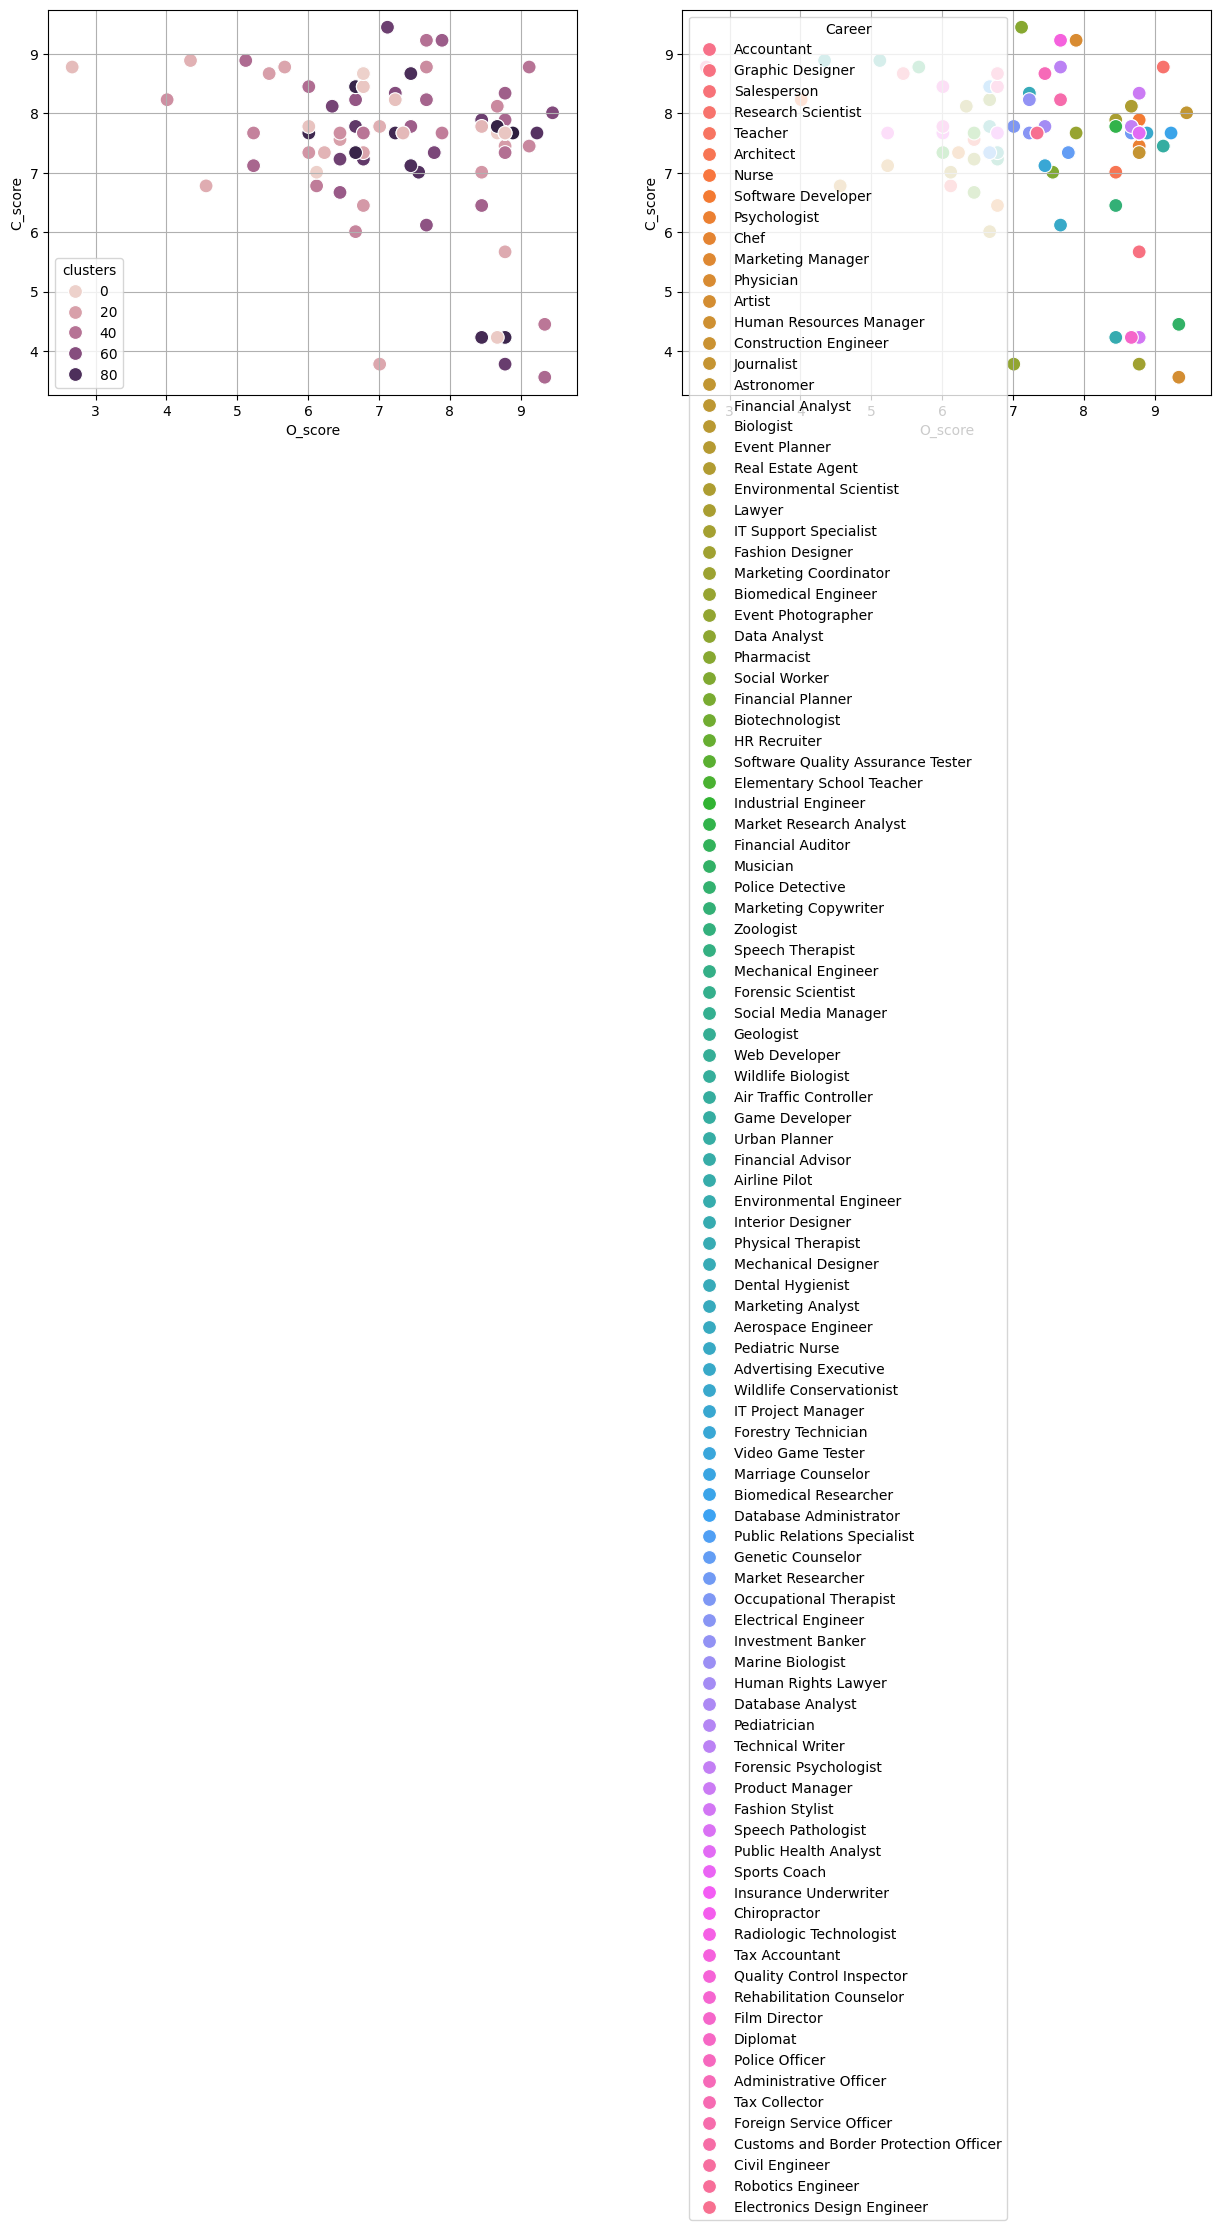

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='O_score',y='C_score',data=cluster,hue='clusters',s=100)
plt.grid()
plt.subplot(1,2,2)
sns.scatterplot(x='O_score',y='C_score',data=cluster,hue='Career',s=100)
plt.grid()

plt.show()

# **Splitting the data**

In [ ]:
y_encode = LabelEncoder().fit_transform(y)

xtrain, ytrain, xtest, ytest = train_test_split(x, y_encode, test_size=0.5, random_state=42)

In [ ]:
print(xtrain.shape)
print()
print(xtest.shape)
print()
print(ytrain.shape)
print()
print(ytest.shape)
print()

(52, 10)

(52,)

(53, 10)

(53,)



In [ ]:
ytrain_onehot = pd.get_dummies(ytrain)
ytest_onehot = pd.get_dummies(ytest)
y_onehot = pd.get_dummies(y)

print(y_encode, y_encode.shape)


[  0  44  86  84  96   6  67  89  77  13  62  73   7  46  16  54   8  34
   9  29  82  27  55  49  30  60  10  28  18  71  88  36  12  45  90  25
  50  57  35  66  74  61 103  92  65  39  87  43 100 101   4  41  98  33
   5  26  52  72  64  21  59   3  69   2 102  48  40  99  63  27  11  19
  79  42  58  68  23  53  56  47  20  70  97  38  76  31  91  78  93  51
  14  81  94  80  83  32  22  75   1  95  37  17  15  85  24] (105,)


In [ ]:
model = keras.Sequential([
    keras.layers.Reshape((10, 1), input_shape=(10,)),  # reshape input to (10, 1)
    keras.layers.Conv1D(32, kernel_size=3, activation='relu'),  # 1D convolutional layer
    keras.layers.MaxPooling1D(pool_size=2),  # max pooling layer
    keras.layers.Flatten(),  # flatten output
    keras.layers.Dense(64, activation='relu'),  # dense layer
    #keras.layers.Reshape((-1, 1)),  # reshape output to (batch_size, num_classes)
    keras.layers.Dense(10, activation='softmax')  # output layer
])

# model = keras.Sequential([
#     keras.layers.Dense(32, input_shape=(10,), activation='relu'),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dense(10, activation='softmax'),
# ])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_20 (Reshape)        (None, 10, 1)             0         
                                                                 
 conv1d_15 (Conv1D)          (None, 8, 32)             128       
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 4, 32)             0         
 ng1D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 128)               0         
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 10)                650       
                                                     

In [ ]:
history = model.fit(xtrain, ytrain, epochs=50, batch_size=36, validation_split=0.2, verbose=1)

Epoch 1/50
2/2 [==============================] - 2s 281ms/step - loss: 2.8259 - accuracy: 0.0000e+00 - val_loss: 2.3285 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 59ms/step - loss: 2.5140 - accuracy: 0.0000e+00 - val_loss: 2.2706 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 59ms/step - loss: 2.3620 - accuracy: 0.0000e+00 - val_loss: 2.2606 - val_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 48ms/step - loss: 2.2933 - accuracy: 0.0000e+00 - val_loss: 2.2351 - val_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 43ms/step - loss: 2.2499 - accuracy: 0.0000e+00 - val_loss: 2.1917 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 42ms/step - loss: 2.2117 - accuracy: 0.0000e+00 - val_loss: 2.1227 - val_accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 48ms/step - loss: 2.1732 - accuracy: 0.0000e+00 - val_loss: 2.03

# **Ignore this part**

In [ ]:
X = data.drop(columns=['Career'])
y = data['Career']

#Langsung Split saja karna data sudah berbentuk angka [Line 14]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

**Values of the Split for X and Y**

In [ ]:
print(X_train)

[[ 0.98802523  0.48107147 -0.94108605 -1.08297508 -0.92090726  0.77494603
   1.47156459  0.54989079  0.5664254  -0.90339971]
 [ 0.82995762  0.29086394  0.07402193  0.16988959  1.13742289 -0.42053002
  -0.47778454 -0.53701984 -0.62457009  1.71061001]
 [-0.04659915  0.1089263  -0.80655366 -0.93713898 -0.66650691  1.74466695
   2.21417379  0.73966884  1.28531456 -0.75556368]
 [-0.36991927 -0.25494898 -1.01446735 -1.15589313 -0.92090726  1.51378102
   2.10071961  0.54989079  1.10290985 -0.90339971]
 [-0.44895308 -0.16398016  1.90855442  0.68031593 -0.01894236 -1.10805702
  -0.766577   -1.17536418 -1.22006784  0.89079205]
 [ 1.06705904 -0.16398016 -0.19504283 -0.27424762  0.62862218 -0.65141595
  -0.42105745 -0.66353854 -0.68358338  1.56277398]
 [ 1.06705904  0.1089263  -0.67202128 -1.15589313  0.62862218 -0.30765245
  -0.18899208  0.92944689  1.40334114  0.44056415]
 [-1.16744224  1.02688439  0.96071263 -0.27424762  0.62862218 -0.70785474
  -0.36433036 -0.53701984 -0.20611222  1.11254609]


In [ ]:
print(X_test)

[[ 0.19050227 -0.43688662 -0.5374889   1.56859035  1.01022271 -1.27737337
  -0.766577   -0.41050114 -1.39710771 -0.08358175]
 [-0.36991927  0.75397793  1.09524501 -0.93713898  0.62862218 -0.65141595
  -0.47778454 -0.79580809 -0.80160996  0.66231819]
 [ 1.14609285  0.1089263  -0.67202128 -1.15589313  0.62862218 -0.30765245
  -0.18899208  0.92944689  1.46235443  0.44056415]
 [-0.44895308  0.19989512 -1.28353211 -0.56591982 -0.01894236  1.40090345
  -0.64796581 -0.79580809 -0.68358338  0.44056415]
 [ 1.06705904  0.1089263  -0.94108605 -1.15589313 -0.92090726  0.66206847
   1.23949922  0.54989079  1.46235443 -0.90339971]
 [-0.92315593  0.19989512 -0.19504283  1.6415084   1.13742289 -0.65141595
  -0.59123872 -0.85906744 -0.74259667  1.11254609]
 [ 0.03243465  0.1089263  -0.80655366 -0.93713898 -0.66650691  1.63178938
   2.21417379  0.73966884  1.34432785 -0.75556368]
 [ 1.31134535 -0.07301134 -0.94108605 -1.08297508 -0.92090726  0.5491909
   1.06931795  0.92944689  1.6393943  -0.90339971]
 

In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# **Until Here to ignore**

# **Modelling**

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Note:
Kurang cocok digunakan sistem categorical. Dikarnakan setiap row unik. Lebih cocok menggunakan Clustering

Cek K-Means Clustering pada TensorFlow. Sebagai Referensi

# **Testing Model With Dropout**

In [ ]:
from keras.layers import Dropout, BatchNormalization
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_encoded),
                                                  y=y_encoded)
# Define the model with dropout and batch normalization
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(10,)))
model.add(BatchNormalization())
model.add(Dropout(0.1))  # 10% dropout
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))  # 10% dropout
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Train Model**

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=36, validation_split=0.2, verbose=1)

#history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 0s 230ms/step - loss: 0.8015 - accuracy: 0.7612 - val_loss: 17.5845 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 186ms/step - loss: 0.7975 - accuracy: 0.7612 - val_loss: 17.6255 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 84ms/step - loss: 0.7918 - accuracy: 0.7612 - val_loss: 17.6677 - val_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 66ms/step - loss: 0.7858 - accuracy: 0.7463 - val_loss: 17.7131 - val_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 91ms/step - loss: 0.7763 - accuracy: 0.7463 - val_loss: 17.7580 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 93ms/step - loss: 0.7674 - accuracy: 0.7761 - val_loss: 17.8080 - val_accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 109ms/step - loss: 0.7619 - accuracy: 0.7761 - val_loss: 17.8591 - val_accuracy: 

# **Evaluate The model**

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


1/1 [==============================] - 0s 25ms/step - loss: 21.3347 - accuracy: 0.0000e+00
Test Accuracy: 0.0


In [ ]:
# Save the model
model.save('career_prediction_model.h5')

# Load the model
model = tf.keras.models.load_model('career_prediction_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Making Prediction**

In [ ]:
# Making predictions on new data
new_data = np.array([[4.45, 6.67, 3.45, 4.34, 5.23, 8.23, 1.56, 2.78, 4.89, 5.12]])
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])
print(f'Predicted Career: {predicted_class[0]}')


1/1 [==============================] - 0s 16ms/step
Predicted Career: Quality Control Inspector


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
